<a href="https://colab.research.google.com/github/cxbxmxcx/EatNoEat/blob/master/Chapter_9_TestModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [11]:
my_drive = '/content/gdrive/My Drive/'
models = my_drive + 'Models'
%ls '/content/gdrive/My Drive/Models'

 checkpoint
 cp-0001.ckpt.data-00000-of-00002
 cp-0001.ckpt.data-00001-of-00002
 cp-0001.ckpt.index
 cp-0002.ckpt.data-00000-of-00002
 cp-0002.ckpt.data-00001-of-00002
 cp-0002.ckpt.index
'cp-0003 (1).ckpt.data-00000-of-00002'
 cp-0003.ckpt.data-00000-of-00002
 cp-0003.ckpt.data-00001-of-00002
 cp-0003.ckpt.index
 cp-0003.ckpt_temp_3aa473385a2c40778714af402d89ce8e/
 cp-0005.ckpt.data-00000-of-00002
 cp-0005.ckpt.data-00001-of-00002
 cp-0005.ckpt.index
 cp-0010.ckpt.data-00000-of-00002
 cp-0010.ckpt.data-00001-of-00002
 cp-0010.ckpt.index
 cp-0015.ckpt.data-00000-of-00002
 cp-0015.ckpt.data-00001-of-00002
 cp-0015.ckpt.index
 cp-0020.ckpt.data-00000-of-00002
 cp-0020.ckpt.data-00001-of-00002
 cp-0020.ckpt.index
 cp-0025.ckpt.data-00000-of-00002
 cp-0025.ckpt.data-00001-of-00002
 cp-0025.ckpt.index


In [0]:
use_NAS = False
if use_NAS:
  IMG_SIZE = 224 # 299 for Inception, 331 for NASNet
  IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
else:
  IMG_SIZE = 299 # 299 for Inception, 331 for NASNet
  IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

In [0]:
def load_image(image_path):
  img = tf.io.read_file(image_path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
  if use_NAS:
    img = tf.keras.applications.nasnet.preprocess_input(img)
  else:
    img = tf.keras.applications.inception_v3.preprocess_input(img)
  return img, image_path

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
import os
from os import listdir
import time
from PIL import Image
import pickle

def create_model(image_batch):
  tf.keras.backend.clear_session()

  if use_NAS:
    # Create the base model from the pre-trained model 
    base_model = tf.keras.applications.NASNetMobile(input_shape=IMG_SHAPE,
                                                  include_top=False,
                                                  weights='imagenet')
  else:
    # Create the base model from the pre-trained model 
    base_model = tf.keras.applications.InceptionResNetV2(input_shape=IMG_SHAPE,
                                                include_top=False,
                                                weights='imagenet')
  feature_batch = base_model(image_batch)
    
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
  feature_batch_average = global_average_layer(feature_batch)
  prediction_layer = tf.keras.layers.Dense(3)
  prediction_batch = prediction_layer(feature_batch_average)

  model = tf.keras.Sequential([
                               base_model,
                               global_average_layer,
                               prediction_layer])

  base_learning_rate = 0.0001
  model.compile(optimizer=tf.keras.optimizers.Nadam(lr=base_learning_rate),
                loss=tf.keras.losses.MeanAbsoluteError(),
                metrics=['mae', 'mse', 'accuracy'])
  return model

In [20]:
import os
from os import listdir
from shutil import copyfile

image_folder = my_drive + 'TestImages/'
if os.path.isdir(image_folder) == False:
  os.makedirs(image_folder)
  new_images = True
else:
  new_images = False

def save_test_image(image):
  copyfile(image, image)

def get_test_images(saved):
  if saved:
    directory = image_folder    
  else:
    directory = '/content/'
  
  images = []
  for file in listdir(directory):    
    if file.endswith(".jpg"):      
      images.append(directory + file)
      if not saved:
        save_test_image(directory + file)
  return images

images = get_test_images(not new_images)
print(images)

['/content/gdrive/My Drive/TestImages/french_toast.jpg', '/content/gdrive/My Drive/TestImages/pizza.jpg', '/content/gdrive/My Drive/TestImages/bip.jpg', '/content/gdrive/My Drive/TestImages/poutine.jpg', '/content/gdrive/My Drive/TestImages/hot_dog.jpg', '/content/gdrive/My Drive/TestImages/apple_pie.jpg', '/content/gdrive/My Drive/TestImages/ramen.jpg', '/content/gdrive/My Drive/TestImages/hamburger.jpg', '/content/gdrive/My Drive/TestImages/ribs.jpg', '/content/gdrive/My Drive/TestImages/fish_and_chips.jpg', '/content/gdrive/My Drive/TestImages/steak.jpg', '/content/gdrive/My Drive/TestImages/prime_rib.jpg', '/content/gdrive/My Drive/TestImages/pie.jpg', '/content/gdrive/My Drive/TestImages/french_toast2.jpg', '/content/gdrive/My Drive/TestImages/fried_chicken.jpg', '/content/gdrive/My Drive/TestImages/peking_duck.jpg', '/content/gdrive/My Drive/TestImages/beef_taco.jpg', '/content/gdrive/My Drive/TestImages/shrimp_and_grits.jpg', '/content/gdrive/My Drive/TestImages/chocolate_cake.j

In [21]:
if len(images) < 0:
  raise Exception('Test images need to be loaded!')
else: 
  x, _ = load_image(images[0])
  img = x[np.newaxis, ...]

  model = create_model(img)
  model.summary()

219062272/219055592 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 8, 8, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 4611      
Total params: 54,341,347
Trainable params: 54,280,803
Non-trainable params: 60,544
_________________________________________________________________


In [0]:
latest = tf.train.latest_checkpoint(models)
latest
if latest != None:
  model.load_weights(latest)

[[6.7254    3.4213533 6.4484844]]
2 /content/gdrive/My Drive/TestImages/bip.jpg


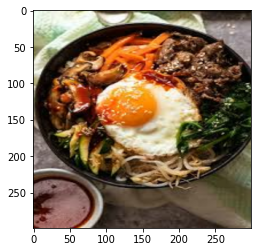

In [31]:
#@title Image Prediction { run: "auto", vertical-output: true, display-mode: "form" }

image_idx = 2 #@param {type:"slider", min:0, max:100, step:1}
cnt = len(images)
if  cnt > 0:
  image_idx = image_idx if image_idx < cnt else cnt - 1
  image = images[image_idx]
  x, _ = load_image(image)
  
  img = x[np.newaxis, ...]
  predict = model.predict(img)
  print(predict+5)
  print(image_idx,image)
  plt.imshow((x+1)/2)